<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Part 3 : Modelling XGBoost

In [1]:
import requests
import re
import pickle
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
with open("./datasets/Z_train.pickle", "rb") as f:
    Z_train = pickle.load(f)

with open("./datasets/y_train.pickle", "rb") as f:
    y_train = pickle.load(f)

with open("./datasets/y_test.pickle", "rb") as f:
    y_test = pickle.load(f)

with open("./datasets/feature.pickle", "rb") as f:
    feature = pickle.load(f)

with open("./datasets/Z_test.pickle", "rb") as f:
    Z_test = pickle.load(f)
with open("./datasets/y_test.pickle", "rb") as f:
    y_test = pickle.load(f)

In [ ]:
X_train = pd.DataFrame(Z_train,columns=feature)
X_test = pd.DataFrame(Z_test,columns=feature)

In [ ]:
len(feature)

232

In [ ]:
import xgboost as xgb

# Pipeline creation for XGBoost
pipeline_xgb = Pipeline([
    ('xgb', xgb.XGBClassifier(objective='binary:logistic', random_state=42))
])

params_xgb = {
    'xgb__n_estimators' : [100, 200, 300],
    'xgb__max_depth' : [2, 3, 4],
    'xgb__tree_method' : ['gpu_hist'],
    'xgb__learning_rate' : [0.01, 0.1, 0.2],
    # 'xgb__scale_pos_weight' : [18,19] # scale_pos_weight = count(negative examples)/count(Positive examples)
}

In [ ]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(
    pipeline_xgb, param_grid=params_xgb, cv=5, scoring='roc_auc', verbose=-1, n_jobs=-1
)

gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_policy=None,
                                                      importance_type=None,
                                                      interaction_constraints=None,
                                                      learning_rate=N...
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=42,
                                                      reg_alpha=None,
                                                      reg_lambda=None, ...))]),
             n_jobs=-1,
             param_grid={'xgb__learning_rate': [0.01, 0.1, 0.2],
                         'xgb__max_depth': [2, 3, 4],
                         'xgb__n_estimators': [100, 200, 300],
                         'xgb__tree_method': ['gpu_hist']},
             scoring='roc_auc', verbose=-1)

In [ ]:
gs.best_params_

{'xgb__learning_rate': 0.2,
 'xgb__max_depth': 4,
 'xgb__n_estimators': 300,
 'xgb__tree_method': 'gpu_hist'}

In [ ]:
import xgboost as xgb

In [ ]:
xgb = xgb.XGBClassifier(objective='binary:logistic', random_state=42, n_estimators=300, learning_rate=0.2, max_depth=4, tree_method='gpu_hist')

xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=0, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

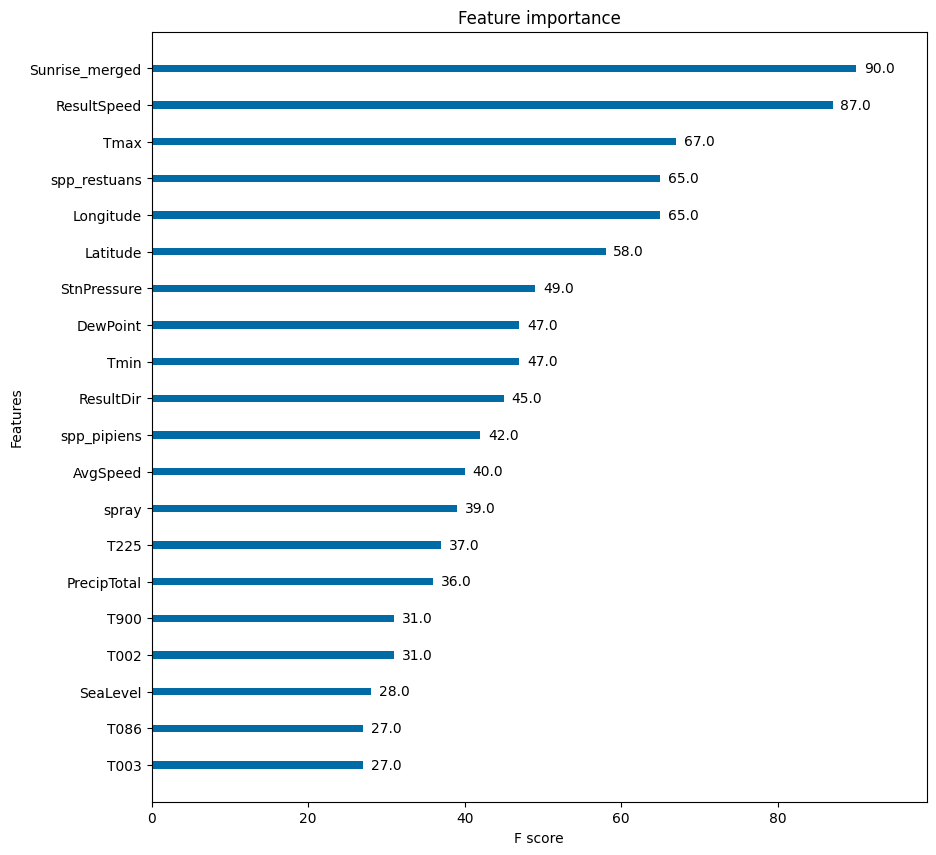

In [ ]:
xgb.feature_importances_

# plt.bar(range(len(xgb.feature_importances_)), xgb.feature_importances_)
# plt.show()

from xgboost import plot_importance
# plt.figure(figsize=(50,50))
fig, ax = plt.subplots(figsize=(10,10))
plot_importance(xgb, ax=ax, max_num_features=20)

plt.grid(visible=None)


plt.savefig("../charts/xgb_boost_feature_importance.png", bbox_inches='tight', dpi=300, facecolor='w')

plt.show()

Text(0.5, 1.0, 'xgboost : Confusion Matrix')

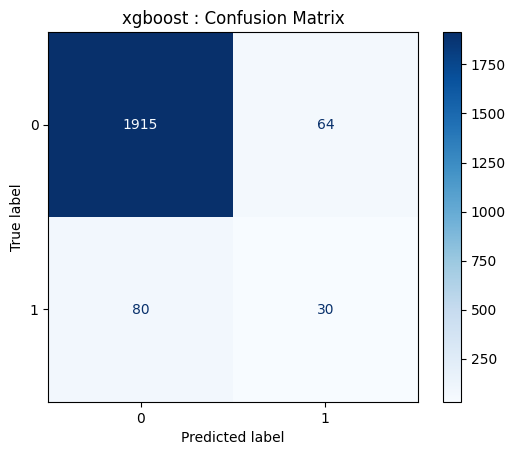

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn import ConfusionMatrixDisplay

y_pred = gs.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=['0','1']).plot(cmap='Blues')

# 0 is python, 1 is ml
plt.title('xgboost : Confusion Matrix')